In [1]:
import json
import random
import csv

from pprint import pprint

## Initialize the data required for the game

 * Player data
 * EPL live table
 * Type ahead search
 * Hint configuration file
 * Mapping from Country to Confederation

In [2]:
from epl_table import EPLTable
from player_type_ahead import PlayerTypeAhead
from hint_config import HintConfig
from soccer_player import SoccerPlayer



players = None
player_map = None
epl_table = None
type_ahead_helper = None
max_guesses = None
hint_config = None
confederation_mapping = None


def init_players():
    global players
    with open("data/augmented_players.json", "r") as f:
        players = [SoccerPlayer(p) for p in json.loads(f.read())]
    
    global player_map
    player_map = {}
    for p in players:
        player_map[p.get_display_name()] = p
        
        
    min_mins_requirement = 900
    min_games = 10

    ## When choosing a random player, restrict the subset to players people would actually know
    global filtered_players
    filtered_players = [p for p in players if p.appearances >= min_games and p.mins_played > min_mins_requirement and p.position != "G"]
   

def pick_random_player():
    return random.choice(list(filtered_players))

def init_type_ahead():
     ## Initialize Type Ahead Search
    global type_ahead_helper
    type_ahead_helper = PlayerTypeAhead(players)
    
def init_hint_config():
    ## Initialize the Hint Configuration File!!
    team_d = 3 
    goal_d = 3
    assist_d = 3 
    app_d = 3
    age_d = 3 
    jersey_d = 3 

    global hint_config
    hint_config = HintConfig(team_d, goal_d, assist_d, app_d, age_d, jersey_d)
    
def init_epl_table():
     ## Initialize EPL Table
    global epl_table
    epl_table = EPLTable("data/epl_table.json")

def init_confederation_mapping():
    ## Initialize the Country -> Continent Mapping
    global confederation_mapping
    confederation_mapping = {}
    with open("data/fifa.csv", "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for row in reader:
            confederation_mapping[row[0]] = row[1]

def init_game():
    init_players()
    init_type_ahead()
    init_hint_config()
    init_epl_table()
    init_confederation_mapping()

In [3]:
init_game()

In [8]:
from guess_history import GuessHistory
from photo_helper import display_player_photo

MAX_GUESSES = 8

def main():
    answer = pick_random_player()
    guess_history = GuessHistory(hint_config)
    
    try:
        while (len(guess_history.guesses) < MAX_GUESSES):
            player_name_guess = ""
            while player_name_guess == "":
                input_name = input("PLAYER NAME: ")

                if input_name.upper() == "BREAK":
                    raise ValueError('Breaking out of the program!')


                valid_names = type_ahead_helper.search_ahead(input_name)
                if len(valid_names) == 1:
                    name = valid_names.pop()
                    if name in [p.get_display_name() for p in guess_history.guesses]:
                        print("DUMBASS! You already guessed that")
                    else:
                        player_name_guess = name
                else:
                    print("VAlID NAMES: " + ", ".join(valid_names))
            
            guess = player_map[player_name_guess]
            display_player_photo(guess)
            

            guess_history.add_guess(guess)
            guess_history.print_history(answer, epl_table, confederation_mapping)
            
            
            if guess.name == answer.name:
                print(answer.get_display_name() + " is correct! YOU WIN!!")
                break
                
                
    except ValueError as err:
        print(err.args)
    
    if len(guess_history.guesses) >= MAX_GUESSES:
        print("YOU LOSE!")
        print("Correct answer was: " + answer.get_display_name())
        display_player_photo(answer)
        print(answer)

PLAYER NAME: Raph
VAlID NAMES: Raphaël Varane, Raphinha
PLAYER NAME: Raphin


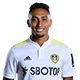

                                                                                     
      Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
  Raphinha  Leeds United   Brazil         F   25      10      9        3           27
         X             ↓        X         X    X       X      X        ↓            ↓
PLAYER NAME: King


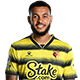

                                                                                        
         Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
     Raphinha  Leeds United   Brazil         F   25      10      9        3           27
            X             ↓        X         X    X       X      X        ↓            ↓
  Joshua King       Watford   Norway         F   30       7      5        3           26
            X             ↑     UEFA         X    ↓       ↓      ↓        ↓            ↓
PLAYER NAME: Holgate


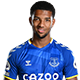

                                                                                          
           Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
       Raphinha  Leeds United   Brazil         F   25      10      9        3           27
              X             ↓        X         X    X       X      X        ↓            ↓
    Joshua King       Watford   Norway         F   30       7      5        3           26
              X             ↑     UEFA         X    ↓       ↓      ↓        ↓            ↓
  Mason Holgate       Everton  England         D   25       4      0        0           16
              X             ✓        ✓         ✓    X       ↑      ↑        ↑            X
PLAYER NAME: Keane


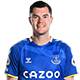

                                                                                          
           Name          Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
       Raphinha  Leeds United   Brazil         F   25      10      9        3           27
              X             ↓        X         X    X       X      X        ↓            ↓
    Joshua King       Watford   Norway         F   30       7      5        3           26
              X             ↑     UEFA         X    ↓       ↓      ↓        ↓            ↓
  Mason Holgate       Everton  England         D   25       4      0        0           16
              X             ✓        ✓         ✓    X       ↑      ↑        ↑            X
  Michael Keane       Everton  England         D   29       5      2        2           25
              ✓             ✓        ✓         ✓    ✓       ✓      ✓        ✓            ✓
Michael Keane is correct! YOU WIN!!


In [10]:
main()